## 1. Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot
import seaborn as sns 
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as sm
from math import sqrt

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Import and read data

In [2]:
data = pd.read_csv("aqardata_2.csv")

In [3]:
data.head(10)

,mainlocation,sublocation,neighborhood,frontage,purpose,streetwidth,size,Pricepm
0,الرياض,غرب الرياض,حي ظهرة لبن,شمال,سكني,20.0,727,1800
1,بريدة,NaN,حي مشعل,غرب,NaN,15.0,450,950
2,الخبر,NaN,حي الحمرا,غرب,تجاري,100.0,1450,3500
3,الخبر,NaN,حي الحزام الاخضر,شرق,NaN,15.0,440,2700
4,بريدة,NaN,حي الرحاب,جنوب غربي,NaN,40.0,784,950
5,الرياض,شمال الرياض,حي العارض,جنوب,تجاري,60.0,5973,2000
6,جدة,شمال جدة,حي الريان,شرق,سكني,20.0,660,2300
7,سكاكا,NaN,حي مخطط كريم الدرزي,شمال,سكني,15.0,735,219
8,الجموم,NaN,حي النسيم,غرب,NaN,60.0,153500,195
9,المدينة المنورة,NaN,حي الخالدية,شمال غربي,تجاري,40.0,591,5076


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mainlocation  2951 non-null   object 
 1   sublocation   2276 non-null   object 
 2   neighborhood  2951 non-null   object 
 3   frontage      2951 non-null   object 
 4   purpose       2604 non-null   object 
 5   streetwidth   2948 non-null   float64
 6   size          2951 non-null   int64  
 7   Pricepm       2951 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 184.6+ KB


## 3. Exploratory Data Analysis (EDA)

### 3.1 Categorical Features

In [5]:
data[["mainlocation" , "sublocation","neighborhood","frontage","purpose"]].describe()

,mainlocation,sublocation,neighborhood,frontage,purpose
count,2951,2276,2951,2951,2604
unique,45,7,288,10,4
top,الرياض,شمال الرياض,حي الملقا,جنوب,سكني
freq,2100,1188,313,488,2005


In [6]:
data[["mainlocation" , "sublocation","neighborhood","frontage","purpose"]].isnull().sum()

mainlocation      0
sublocation     675
neighborhood      0
frontage          0
purpose         347
dtype: int64

In [7]:
data["mainlocation"].value_counts()

الرياض                            2100
الخبر                              242
جدة                                176
الدرعية                             64
المدينة المنورة                     56
بريدة                               55
الدمام                              40
الهفوف                              26
الزلفي                              25
مكة المكرمة                         20
جازان                               17
ثادق                                14
الرس                                13
ابها                                11
الخرج                               10
رابغ                                10
المزاحمية                            7
بيش                                  6
احد رفيده                            6
ثول                                  6
عنيزة                                5
ابو عريش                             4
المجمعة                              3
الظهران                              3
الطائف                               3
سكاكا                    

In [8]:
data["sublocation"].value_counts(dropna=False)

# we have here a mising value  

شمال الرياض    1188
NaN             675
شرق الرياض      482
غرب الرياض      337
شمال جدة        171
جنوب الرياض      81
وسط الرياض       12
جنوب جدة          5
Name: sublocation, dtype: int64

In [9]:
data["neighborhood"].value_counts()

حي الملقا     313
حي النرجس     197
حي بنبان      104
حي حطين        93
حي عرقة        85
             ... 
حي الضباط       1
حي شويهة        1
حي المهدج       1
حي الرونة       1
حي الزرقاء      1
Name: neighborhood, Length: 288, dtype: int64

In [10]:
data["neighborhood"].value_counts()

حي الملقا     313
حي النرجس     197
حي بنبان      104
حي حطين        93
حي عرقة        85
             ... 
حي الضباط       1
حي شويهة        1
حي المهدج       1
حي الرونة       1
حي الزرقاء      1
Name: neighborhood, Length: 288, dtype: int64

In [11]:
data["purpose"].value_counts(dropna=False)

سكني             2005
NaN               347
تجاري             329
سكني أو تجاري     268
غير محدد            2
Name: purpose, dtype: int64

### 3.2 Numeric Features

In [12]:
data[["streetwidth" , "size","Pricepm"]].describe()

,streetwidth,size,Pricepm
count,2948.000000,2.951000e+03,2951.000000
mean,24.691995,1.040184e+04,2624.025754
std,15.208720,2.033230e+05,2970.544618
min,1.000000,8.100000e+01,1.000000
25%,15.000000,5.750000e+02,1200.000000
50%,20.000000,8.250000e+02,2600.000000
75%,30.000000,1.350000e+03,3500.000000
max,100.000000,1.000000e+07,83333.000000


In [13]:
data[["streetwidth" , "size","Pricepm"]].head()

,streetwidth,size,Pricepm
0,20.0,727,1800
1,15.0,450,950
2,100.0,1450,3500
3,15.0,440,2700
4,40.0,784,950


<IPython.core.display.Javascript object>

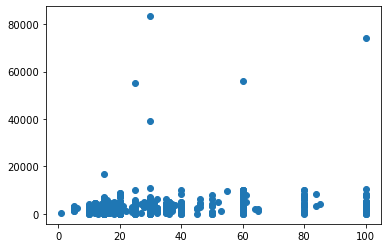

In [14]:
plt.scatter(data["streetwidth"],data['Pricepm'])

<AxesSubplot:xlabel='streetwidth', ylabel='Density'>

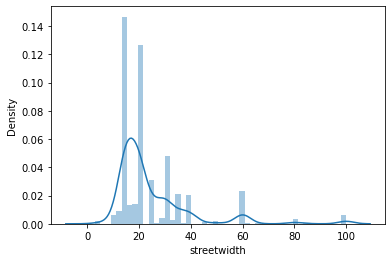

In [15]:
sns.distplot(data["streetwidth"])

<IPython.core.display.Javascript object>

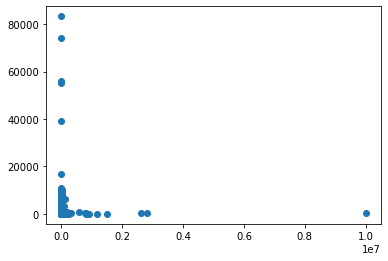

In [16]:
plt.scatter(data["size"],data['Pricepm'])

<AxesSubplot:xlabel='size', ylabel='Density'>

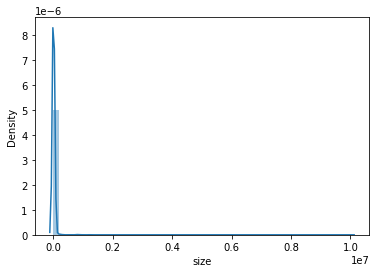

In [17]:
sns.distplot(data["size"])

<AxesSubplot:xlabel='Pricepm', ylabel='Density'>

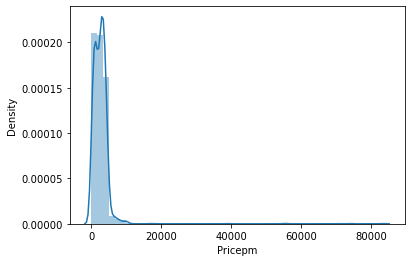

In [18]:
sns.distplot(data["Pricepm"])

## 4. Feature transformation

### 4.1 Log Transformation for Target feature

In [19]:
numeric_feature = data.select_dtypes(np.number)

In [20]:
for column in numeric_feature:
    if column == "Pricepm":
        continue
    data[column] = np.log(data[column])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

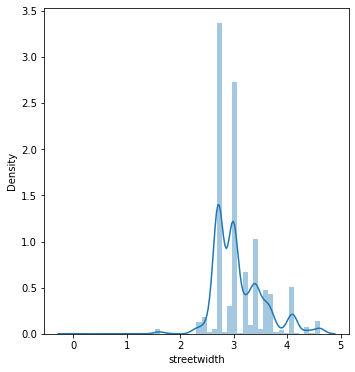

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

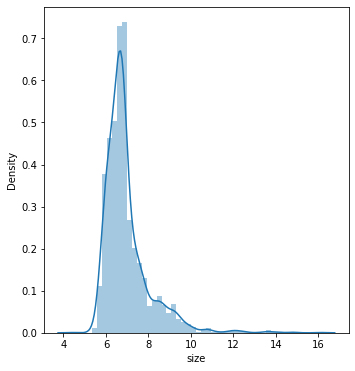

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

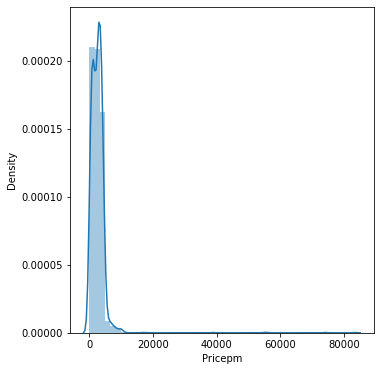

In [21]:
for i in numeric_feature:
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)

    sns.distplot(data[i])
    
    plt.show()

### 4.2 Log Transformation for Skewed Features

In [22]:
data["Pricepm"] = np.log1p(data["Pricepm"])

<AxesSubplot:xlabel='Pricepm', ylabel='Density'>

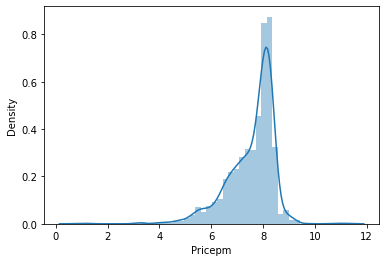

In [23]:
sns.distplot(data["Pricepm"])

## 5. Cleaning the data

In [24]:
data.isnull().sum()

mainlocation      0
sublocation     675
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

### 5.1 fill categorical missing values

#### 5.1.1 sublocation feature

In [25]:
# as i am from sudi arabea i know the sublocation of these 
data.loc[data["mainlocation"]=="الدرعية","sublocation"]="شمال الرياض"
data.loc[data["mainlocation"]=="الخبر","sublocation"]="جنوب الشرقية"
data.loc[data["mainlocation"]=="الدمام","sublocation"]="شمال الشرقية"
data.loc[data["mainlocation"]=="بريدة","sublocation"]="شرق القصيم"
data.loc[data["mainlocation"]=="الرس","sublocation"]="غرب القصيم"
data.loc[data["mainlocation"]=="رابغ","sublocation"]="شمال مكة المكرمة"
data.loc[data["mainlocation"]=="المزاحمية","sublocation"]="غرب الرياض"  
data.loc[data["mainlocation"]=="الزلفي","sublocation"]="شمال الرياض"
data.loc[data["mainlocation"]=="الخرج","sublocation"]="جنوب شرق الرياض"
data.loc[data["mainlocation"]=="الهفوف","sublocation"]="غرب الشرقية"
data.loc[data["mainlocation"]=="ثادق","sublocation"]="شمال غرب الرياض"
data.loc[data["mainlocation"]=="ثول","sublocation"]="شمال جدة"
data.loc[data["mainlocation"]=="عنيزة","sublocation"]="جنوب القصيم"


In [26]:
##data["mainlocation"][1]+"-"+data["neighborhood"][1] 
# i will try this one 

In [27]:
data.isnull().sum()

mainlocation      0
sublocation     158
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

In [28]:
# the remaning sublocation mising value i change it with the mainlocation beacuse if i change it manualy i will take time 
# i do manually only that have more than one mising value 

In [29]:
data["sublocation"].fillna(data.mainlocation,inplace=True)

In [30]:
data.isnull().sum()

mainlocation      0
sublocation       0
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

#### 5.1.2 purpose feature

In [31]:
data["purpose"].value_counts(dropna=False)

سكني             2005
NaN               347
تجاري             329
سكني أو تجاري     268
غير محدد            2
Name: purpose, dtype: int64

as we see here are the value called "غير محدد" which is undefined so we will make all mising value to "غير محدد" (undefined)

In [32]:
data["purpose"].fillna("غير محدد", inplace = True)

In [33]:
data.isnull().sum()

mainlocation    0
sublocation     0
neighborhood    0
frontage        0
purpose         0
streetwidth     3
size            0
Pricepm         0
dtype: int64

### 5.2 fill numeric missing values

#### 5.2.1 streetwidth feature

In [34]:
data["streetwidth"].fillna(data["streetwidth"].median(), inplace = True)

In [35]:
data.isnull().sum()

mainlocation    0
sublocation     0
neighborhood    0
frontage        0
purpose         0
streetwidth     0
size            0
Pricepm         0
dtype: int64

## 6. Feature Scaling

In [36]:
cat_data =[feature for feature in data.columns if data[feature].dtypes == 'O']
numeric_feature =[feature for feature in data.columns if data[feature].dtypes != 'O']

In [37]:
cat_data

['mainlocation', 'sublocation', 'neighborhood', 'frontage', 'purpose']

In [38]:
numeric_feature

['streetwidth', 'size', 'Pricepm']

In [39]:
data[cat_data]

,mainlocation,sublocation,neighborhood,frontage,purpose
0,الرياض,غرب الرياض,حي ظهرة لبن,شمال,سكني
1,بريدة,شرق القصيم,حي مشعل,غرب,غير محدد
2,الخبر,جنوب الشرقية,حي الحمرا,غرب,تجاري
3,الخبر,جنوب الشرقية,حي الحزام الاخضر,شرق,غير محدد
4,بريدة,شرق القصيم,حي الرحاب,جنوب غربي,غير محدد
...,...,...,...,...,...
2946,الرياض,جنوب الرياض,حي طيبة,شمال غربي,سكني
2947,رياض الخبراء,رياض الخبراء,حي النزهة,شمال غربي,سكني أو تجاري
2948,بريدة,شرق القصيم,حي الحمر,شرق,سكني
2949,الرياض,شمال الرياض,حي الملقا,جنوب,سكني


## 7. Feature Encoding

In [40]:
data = pd.get_dummies(data,drop_first=True)


In [41]:
data.head(10)

,streetwidth,size,Pricepm,mainlocation_ابو عريش,mainlocation_احد رفيده,mainlocation_الجموم,mainlocation_الخبر,mainlocation_الخرج,mainlocation_الدرعية,mainlocation_الدلم,...,frontage_جنوب شرقي,frontage_جنوب غربي,frontage_شرق,frontage_شمال,frontage_شمال شرقي,frontage_شمال غربي,frontage_غرب,purpose_سكني,purpose_سكني أو تجاري,purpose_غير محدد
0,2.995732,6.588926,7.496097,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2.708050,6.109248,6.857514,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,4.605170,7.279319,8.160804,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.708050,6.086775,7.901377,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3.688879,6.664409,6.857514,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,4.094345,8.695005,7.601402,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2.995732,6.492240,7.741099,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,2.708050,6.599870,5.393628,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,4.094345,11.941456,5.278115,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,3.688879,6.381816,8.532476,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 7. split the data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Pricepm',axis=1), 
                                                    data['Pricepm'], test_size=0.25, 
                                                    random_state=42)

## 8. Model Selection and predict score 

In [43]:
RidgeCV=linear_model.RidgeCV()

RidgeCV.fit(X_train, y_train)

RidgeCV_pred = RidgeCV.predict(X_test)

print("RidgeCV performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, RidgeCV_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, RidgeCV_pred), 2))
print("Root Mean Absolute Error (RMSE) =", sqrt(sm.mean_squared_error(y_test, RidgeCV_pred)))
print("R2 score =", round(sm.r2_score(y_test, RidgeCV_pred), 2))

RidgeCV performance:
Mean absolute error(MAE) = 0.26
Mean squared error(MSE) = 0.28
Root Mean Absolute Error (RMSE) = 0.529974477931231
R2 score = 0.72
